<!-- Trabalho Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Fundamentos de Linguagem Python - Do Básico a Aplicações de IA</font>
# <font color='blue'>Lista 5 de Exercícios</font>

**ATENÇÃO**: Esta lista de exercícios pode requerer pesquisa complementar. A solução será apresentada no próximo capítulo.

In [9]:
# Imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#### Exercício 1: Análise de Distribuição de Receita Mensal

- Contexto: Uma loja online deseja entender a variabilidade das receitas mensais para ajustar seu fluxo de caixa.

- Tarefa: Carregue os dados simulados de receita mensal e apresente um relatório com média, mediana, desvio-padrão, assimetria e curtose. Visualize a distribuição e interprete se ela é simétrica, à direita ou à esquerda.

- Resultado esperado: Descreva a tendência central e a dispersão, comente se a média representa bem o conjunto.

In [10]:
# Seed
np.random.seed(10)

# Cria dados de receita
receita = np.random.normal(50000, 8000, 100)

# Cria o dataframe
df = pd.DataFrame({'Receita': receita})

# Visualiza os dados
df.head()

,Receita
0,60652.692033
1,55722.231795
2,37636.797663
3,49932.929201
4,54970.687791


### RELATÓRIO DE RECEITA MENSAL ###
Média: 50635.33
Mediana: 50754.95
Desvio Padrão: 7775.29
Assimetria (Skewness): 0.01
Curtose (Kurtosis): 0.19


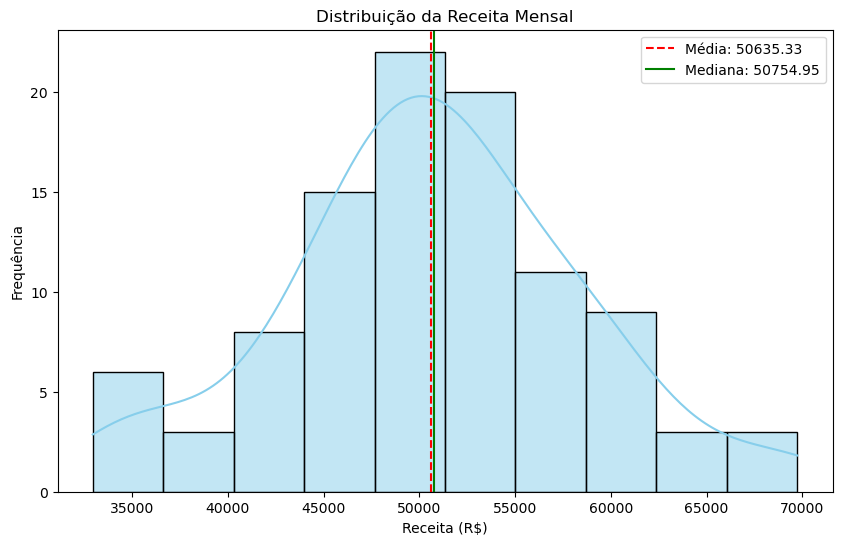

In [11]:
# Solução
# Configuração inicial 
np.random.seed(10)
receita = np.random.normal(50000, 8000, 100)
df = pd.DataFrame({'Receita': receita})

# --- Relatório de Estatísticas ---
estatisticas = {
    "Média": df['Receita'].mean(),
    "Mediana": df['Receita'].median(),
    "Desvio Padrão": df['Receita'].std(),
    "Assimetria (Skewness)": df['Receita'].skew(),
    "Curtose (Kurtosis)": df['Receita'].kurtosis()
}

print("### RELATÓRIO DE RECEITA MENSAL ###")
for chave, valor in estatisticas.items():
    print(f"{chave}: {valor:.2f}")

# --- Visualização ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Receita'], kde=True, color='skyblue')
plt.axvline(df['Receita'].mean(), color='red', linestyle='--', label=f"Média: {df['Receita'].mean():.2f}")
plt.axvline(df['Receita'].median(), color='green', linestyle='-', label=f"Mediana: {df['Receita'].median():.2f}")

plt.title('Distribuição da Receita Mensal')
plt.xlabel('Receita (R$)')
plt.ylabel('Frequência')
plt.legend()
plt.show()


#### Exercício 2: Desempenho por Segmento de Cliente

- Contexto: Uma empresa quer comparar o valor médio gasto por clientes novos e antigos.

- Tarefa: Para os dois grupos (clientes novos e antigos), calcule média, mediana e desvio-padrão, e compare visualmente com boxplot. Discuta se há sobreposição entre os grupos e qual apresenta maior variabilidade.

- Resultado esperado: Indique diferenças de média e dispersão, e o que isso sugere sobre o perfil de gasto.

In [12]:
# Seed
np.random.seed(5)

# Dataframe
clientes = pd.DataFrame({
    'Grupo': ['Novo']*80 + ['Antigo']*80,
    'Gasto': np.concatenate([np.random.normal(180, 40, 80),
                             np.random.normal(230, 35, 80)])
})

# Visualiza os dados
clientes.sample(10)

,Grupo,Gasto
122,Antigo,216.853270
119,Antigo,229.406914
143,Antigo,207.787163
40,Novo,167.765879
4,Novo,184.384394
27,Novo,165.467565
150,Antigo,279.075832
106,Antigo,200.373598
82,Antigo,256.100443
50,Novo,236.535921


### Resumo Estatístico por Segmento ###
             Média     Mediana  Desvio Padrão
Grupo                                        
Antigo  232.921448  231.443713      38.388523
Novo    182.692648  177.481971      38.652415
------------------------------


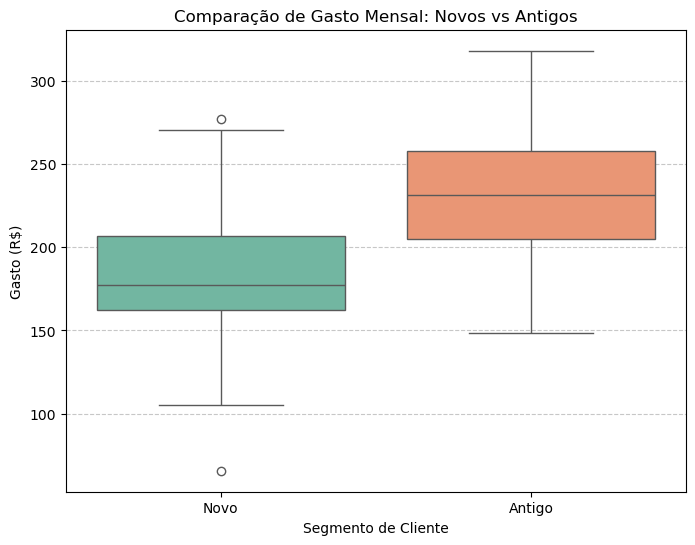

In [13]:
# Solução
# 1. Calcular estatísticas descritivas por grupo
estatisticas_grupo = clientes.groupby('Grupo')['Gasto'].agg(['mean', 'median', 'std']).rename(
    columns={'mean': 'Média', 'median': 'Mediana', 'std': 'Desvio Padrão'}
)

print("### Resumo Estatístico por Segmento ###")
print(estatisticas_grupo)
print("-" * 30)

# 2. Criar o Boxplot para comparação visual
plt.figure(figsize=(8, 6))
# Correção: atribuindo 'x' ao 'hue' e desativando a legenda (já que o eixo X já identifica os grupos)
sns.boxplot(x='Grupo', y='Gasto', data=clientes, palette='Set2', hue='Grupo', legend=False)

plt.title('Comparação de Gasto Mensal: Novos vs Antigos')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Gasto (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Exercício 3: Correlação Entre Horas de Estudo e Nota

- Contexto: Um professor quer saber se o tempo de estudo está associado ao desempenho dos alunos.

- Tarefa: Calcule a correlação de Pearson e gere o gráfico de dispersão com linha de regressão. Interprete o grau e a direção da relação.

- Resultado esperado: Descreva se há correlação positiva, negativa ou nula e o que isso significa em termos práticos.

In [14]:
# Seed
np.random.seed(2)

# Dados
horas = np.random.uniform(1, 10, 50)
notas = 5*horas + np.random.normal(0, 5, 50)

# Dataframe
df = pd.DataFrame({'Horas': horas, 'Nota': notas})

# Visualiza os dados
df.head()

,Horas,Nota
0,4.923954,20.474094
1,1.233336,6.605232
2,5.946962,34.736641
3,4.917902,22.684045
4,4.783310,22.038204


### Análise de Correlação ###
Coeficiente de Pearson: 0.9149
------------------------------


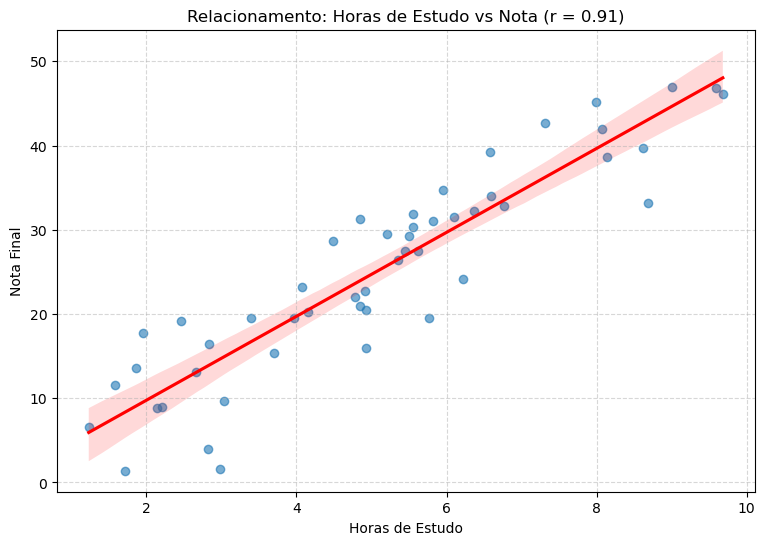

In [15]:
# Solução
# 1. Calcular a Correlação de Pearson
correlacao = df['Horas'].corr(df['Nota'])

print(f"### Análise de Correlação ###")
print(f"Coeficiente de Pearson: {correlacao:.4f}")
print("-" * 30)

# 2. Gerar Gráfico de Dispersão com Linha de Regressão
plt.figure(figsize=(9, 6))
sns.regplot(x='Horas', y='Nota', data=df, 
            scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red'})

plt.title(f'Relacionamento: Horas de Estudo vs Nota (r = {correlacao:.2f})')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota Final')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### Exercício 4: Variação Semanal de Vendas

- Contexto: O gestor deseja entender como as vendas variam ao longo da semana.

- Tarefa: Simule dados de vendas diárias, calcule média e desvio por dia da semana e gere um gráfico de barras. Interprete os dias de maior e menor performance.

- Resultado esperado: Identifique os dias mais fortes e mais fracos, e comente sobre a estabilidade semanal das vendas.

In [16]:
# Seed
np.random.seed(3)

# Dados
dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
vendas = pd.DataFrame({
    'Dia': np.random.choice(dias, 200),
    'Vendas': np.random.normal(1000, 150, 200)
})

# Visualiza os dados
vendas.head()

,Dia,Vendas
0,Qua,911.338189
1,Seg,922.537395
2,Ter,856.000573
3,Qui,1056.594285
4,Seg,913.793737


### Desempenho de Vendas por Dia ###
            mean         std
Dia                         
Seg  1008.344683  121.895506
Ter   990.271715  142.264723
Qua  1009.722472  134.496526
Qui  1027.466786  196.069107
Sex  1049.790137  152.085006
Sab  1021.630030  133.611346
Dom  1034.716174  161.899699
------------------------------


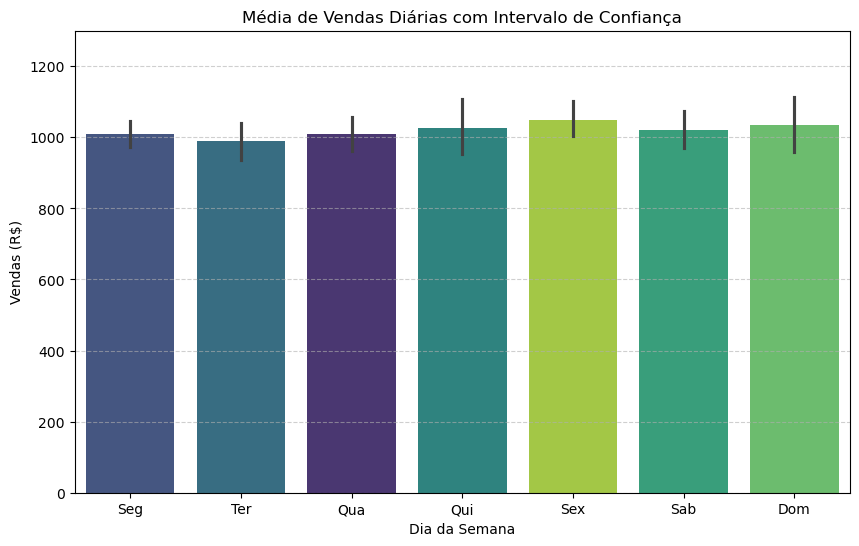

In [17]:
# Solução
# 1. Definir a ordem correta dos dias
ordem_dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']

# 2. Calcular média e desvio padrão por dia
relatorio_vendas = vendas.groupby('Dia')['Vendas'].agg(['mean', 'std']).reindex(ordem_dias)

print("### Desempenho de Vendas por Dia ###")
print(relatorio_vendas)
print("-" * 30)

# 3. Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Dia', y='Vendas', data=vendas, order=ordem_dias, palette='viridis', hue='Dia', legend=False)

plt.title('Média de Vendas Diárias com Intervalo de Confiança')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas (R$)')
plt.ylim(0, 1300) # Ajuste para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Exercício 5: Estimativa da Média com Intervalo de Confiança (Statsmodels)

- Contexto: Um analista de RH quer estimar a altura média dos colaboradores com 95% de confiança.

- Tarefa: Calcule a média e o intervalo de confiança usando o DescrStatsW do Statsmodels. Interprete o resultado como se fosse parte de um relatório técnico.

- Resultado esperado: Apresente a altura média estimada e explique o significado do intervalo de confiança no contexto da amostra.

In [ ]:
# Seed
np.random.seed(7)

# Conjunto de dados
alturas = np.random.normal(1.75, 0.08, 40)

# Visualiza os dados
alturas

In [ ]:
# Solução


# Fim